<center><h1>Credit card fraud detection</h1></center>
<center><i>Project: Detect possible credit card frauds</i></center>


## Credit card fraud
Credit card fraud is when someone uses another person's credit card to make unauthorized purchases or access funds through cash advances.\
As a business owner, you can avoid serious headaches by recognizing potentially fraudulent use of credit cards in your payment environment.\
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Project target:
The target of this project is to build a model capable of detecting possible fraudulent use of credit card. 
Our aim is to detect all fraudulent transactions and minimizing false negative rate.\
The biggest obstacle in this task is the inbalance of the target class. 

## Our dataset
The datasets contains transactions made by credit cards in September 2013 by european cardholders.\
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.\
It contains only numerical input variables which are the result of a PCA transformation because there is confidencial information that can not be provided. Features V1 to V28 are the principal components btained with the PCA. \
<br>
The features that were not trasnformed are 'Time' and 'Amount': 
<ul>
    <li><b>Time: </b>Seconds elapsed between each transaction and the first transaction in the dataset</li>
    <li><b>Amount: </b>Transaction value. </li>
    <li><b>Class: </b> Target feature, it indicates wether the instance was a fraus or not. </li>
</ul>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import pandas as pd

# import dataset
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Exploratory Data Analysis

In [3]:
# Check for null vlaues
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
# Feature names
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# Datatypes
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


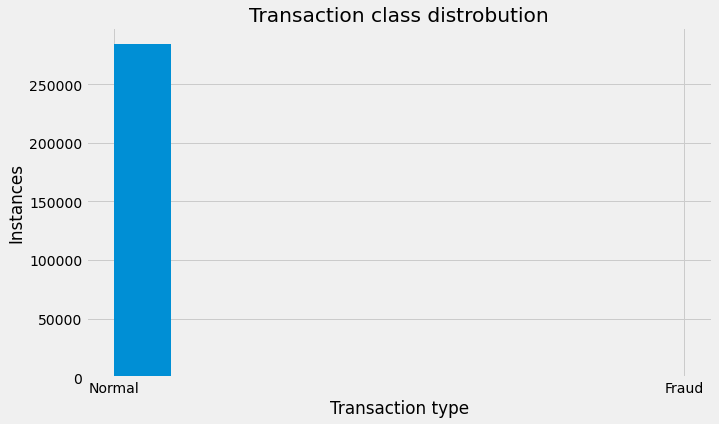

In [8]:
from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")

plt.figure(figsize=(10, 6))
plt.title("Transaction class distrobution")
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.xlabel("Transaction type")
plt.ylabel("Instances")
df.Class.hist()

The target feature is so inbalanced that we are not able to visualize fraud instances in the bar chart. \
We might build a model with a lot of erros, the algorithm will probably overfit and will assume that all instances are not fraudulent, in that case, we are getting an accuracy of 83%, that seems to be performing well, but is tricky, since we are not detecting any fraudulent instance. 

In [9]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
# Separate datasets into fraudulent and non fraudulent
fraud = df[df.Class == 1]
normal = df[df.Class == 0]

print("Fraud shape: ", fraud.shape)
print("Normal shape: ", normal.shape)

Fraud shape:  (492, 31)
Normal shape:  (284315, 31)


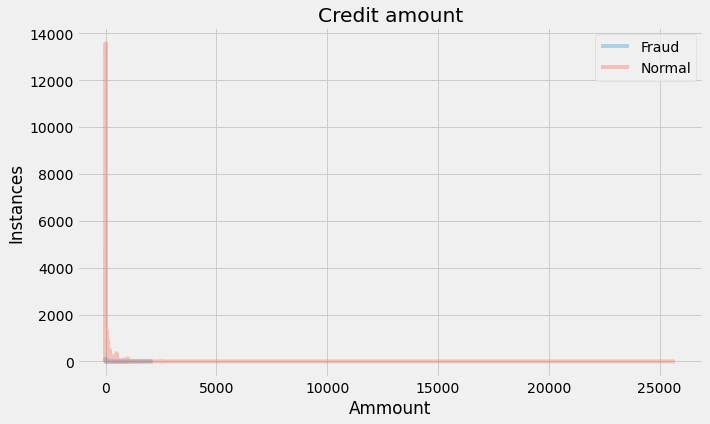

In [11]:
plt.figure(figsize=(10, 6))
plt.title("Credit amount")
plt.plot(
    np.sort(fraud.Amount.unique()), 
    fraud.Amount.value_counts().sort_index(), 
    label = "Fraud", 
    alpha=.3
)
plt.plot(
    np.sort(normal.Amount.unique()), 
    normal.Amount.value_counts().sort_index(), 
    label = "Normal", 
    alpha=.3
)
plt.xlabel("Ammount")
plt.ylabel("Instances")
plt.legend()

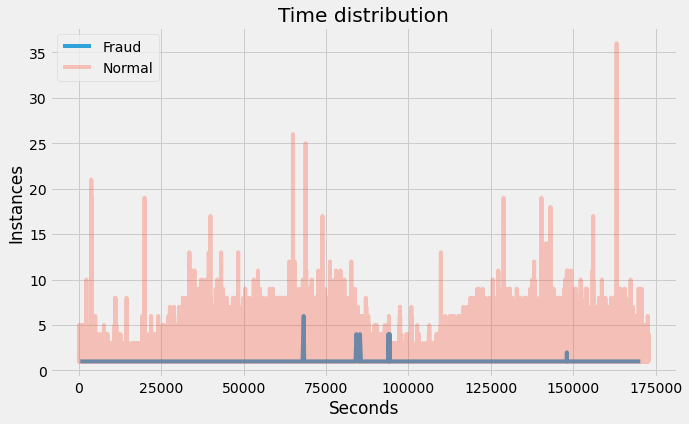

In [12]:
plt.figure(figsize=(10, 6))
plt.title("Time distribution")
plt.plot(
    np.sort(fraud.Time.unique()), 
    fraud.Time.value_counts().sort_index(), 
    label = "Fraud", 
    alpha=.8
)
plt.plot(
    np.sort(normal.Time.unique()), 
    normal.Time.value_counts().sort_index(), 
    label = "Normal", 
    alpha=.3
)
plt.xlabel("Seconds")
plt.ylabel("Instances")
plt.legend()

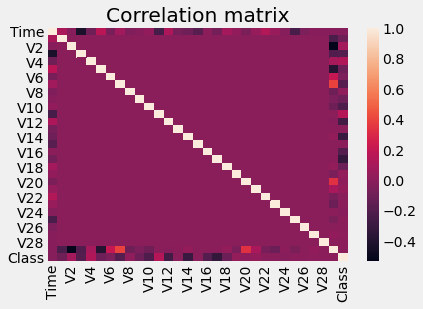

In [13]:
import seaborn as sns 

plt.title("Correlation matrix")
sns.heatmap(df.corr())

## Data preprocessing

In [14]:
from sklearn.preprocessing import StandardScaler

# Scale Time and Ammount features
scaler = StandardScaler() 
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])

print("***** Time ***** ")
print("STD: {:.2f}".format(df.Time.std()))
print("Mean: {:.2f}".format(df.Time.mean()))
print("***** Amount ***** ")
print("STD: {:.2f}".format(df.Amount.std()))
print("Mean: {:.2f}".format(df.Amount.mean()))

***** Time ***** 
STD: 1.00
Mean: -0.00
***** Amount ***** 
STD: 1.00
Mean: 0.00


In [15]:
from sklearn.model_selection import train_test_split as tts 

# Separate dataset into train, validation and test dataset

X = df.drop("Class", axis=1)
y = df.Class

X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)
X_train, X_val, y_train, y_val = tts(X_train, y_train, test_size=.1)

print("Train set fraud instances: ", np.sum(y_train))
print("Validation set fraud instances: ", np.sum(y_val))
print("Test set fraud instances: ", np.sum(y_test))

Train set fraud instances:  347
Validation set fraud instances:  32
Test set fraud instances:  113


In [16]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score

def getScore(actual, predicted): 
    acc = accuracy_score(actual, predicted)
    print("Accuracy score: {:.4f}".format(acc))
    
    f1 = f1_score(actual, predicted) 
    print("F1 score: {:.4f}".format(f1))
    
    rocauc = roc_auc_score(actual, predicted)
    print("ROC AUC: {:.4f}".format(rocauc))
    
    conf_matrix = confusion_matrix(actual, preds)
    tn = conf_matrix[0, 0]
    fn = conf_matrix[1, 0]
    fp = conf_matrix[0, 1]
    tp = conf_matrix[1, 1]
    
    print("Precision: {:.4f}".format(tp/(tp+fp)*100))
    print("Sensitivity: {:.4f}".format(tp/(tp+fn)*100))
    print("Specificity: {:.4f}".format(tn/(tn+fp)*100))
    # This is what I want to minimize
    print("False omission rate: {:.4f}".format(fn/(tn+fn)*100))

## Model evaluation 

### Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
preds = forest.predict(X_val)
getScore(y_val, preds)

Accuracy score: 0.9995
F1 score: 0.8070
ROC AUC: 0.8593
Precision: 92.0000
Sensitivity: 71.8750
Specificity: 99.9912
False omission rate: 0.0395


### Convolutional Neural Network

In [18]:
import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout

METRICS = [
    'accuracy',
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model = Sequential() 
model.add(Dense(32, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=METRICS)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                992       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 7,329
Trainable params: 7,329
Non-trainable params: 0
_________________________________________________________________


In [19]:
res = model.fit(
    X_train, y_train, 
    validation_data = (X_val, y_val), 
    batch_size = 16, 
    epochs = 10, 
)

Epoch 1/10
12817/12817 [==============================] - 20s 2ms/step - loss: 0.0054 - accuracy: 0.9993 - precision: 0.8220 - recall: 0.7320 - val_loss: 0.0034 - val_accuracy: 0.9995 - val_precision: 0.8846 - val_recall: 0.7188
Epoch 2/10
12817/12817 [==============================] - 19s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - precision: 0.8585 - recall: 0.7695 - val_loss: 0.0040 - val_accuracy: 0.9994 - val_precision: 0.8750 - val_recall: 0.6562
Epoch 3/10
12817/12817 [==============================] - 19s 1ms/step - loss: 0.0029 - accuracy: 0.9994 - precision: 0.8686 - recall: 0.7810 - val_loss: 0.0034 - val_accuracy: 0.9995 - val_precision: 0.8846 - val_recall: 0.7188
Epoch 4/10
12817/12817 [==============================] - 19s 2ms/step - loss: 0.0027 - accuracy: 0.9994 - precision: 0.8863 - recall: 0.7637 - val_loss: 0.0037 - val_accuracy: 0.9995 - val_precision: 0.8846 - val_recall: 0.7188
Epoch 5/10
12817/12817 [==============================] - 19s 1ms/step - loss: 0.002

In [20]:
results = model.evaluate(X_test, y_test)

for i, j in zip(METRICS, results): 
    print("{}: {:0.4f}".format(i, j))

1781/1781 [==============================] - 2s 1ms/step - loss: 0.0048 - accuracy: 0.9993 - precision: 0.9091 - recall: 0.7080
accuracy: 0.0048
<tensorflow.python.keras.metrics.Precision object at 0x7faf2e6eac90>: 0.9993
<tensorflow.python.keras.metrics.Recall object at 0x7faef483af50>: 0.9091


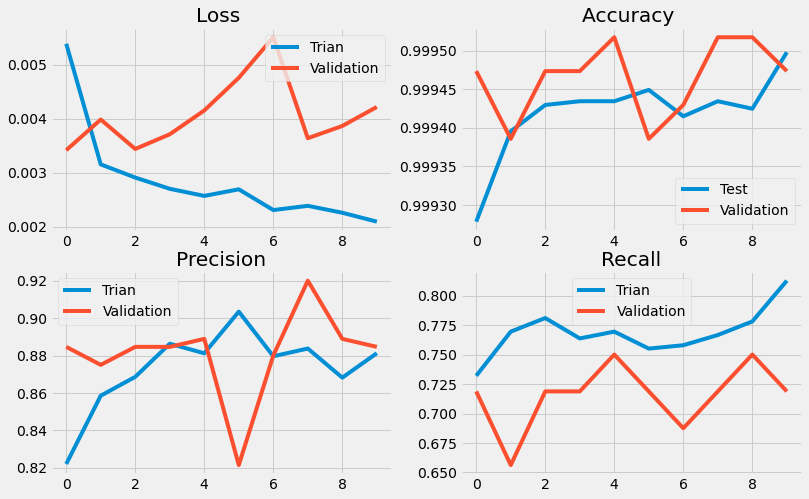

In [21]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.title("Loss ")
plt.plot(res.history['loss'], label="Trian")
plt.plot(res.history['val_loss'], label="Validation")
plt.legend()

plt.subplot(4, 2, 2)
plt.title("Accuracy ")
plt.plot(res.history['accuracy'], label="Test")
plt.plot(res.history['val_accuracy'], label="Validation")
plt.legend()

plt.subplot(4, 2, 3)
plt.title("Precision")
plt.plot(res.history['precision'], label="Trian")
plt.plot(res.history['val_precision'], label="Validation")
plt.legend()

plt.subplot(4, 2, 4)
plt.title("Recall")
plt.plot(res.history['recall'], label="Trian")
plt.plot(res.history['val_recall'], label="Validation")
plt.legend()